In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
def drop_id(df):
    new_df = df.drop(columns='id', axis =1)
    return new_df

In [4]:
train_df= drop_id(train)
test_df= drop_id(test)

In [5]:
train_df['TotalAggregateComponent'] = train_df['CoarseAggregateComponent'] + train_df['FineAggregateComponent']
train_df['WaterToCementRatio'] = train_df['WaterComponent'] / train_df['CementComponent']

test_df['TotalAggregateComponent'] = test_df['CoarseAggregateComponent'] + test_df['FineAggregateComponent']
test_df['WaterToCementRatio'] = test_df['WaterComponent'] / test_df['CementComponent']

In [6]:
bins = [0, 30, 180, float('inf')]
labels = ['Young', 'Intermediate', 'Old']

# Create the new 'AgeCategory' column using pd.cut
train_df['AgeCategory'] = pd.cut(train_df['AgeInDays'], bins=bins, labels=False, right=False)

# Map the numerical labels to the corresponding categories
train_df['AgeCategory'] = train_df['AgeCategory'].map(dict(enumerate(labels)))


train_df['AgeCategory']= train_df['AgeCategory'].replace("Young", "1")
train_df['AgeCategory']= train_df['AgeCategory'].replace("Intermediate", "2")
train_df['AgeCategory']= train_df['AgeCategory'].replace("Old", "3")
train_df['AgeCategory']= train_df['AgeCategory'].astype(int)

# Create the new 'AgeCategory' column using pd.cut
test_df['AgeCategory'] = pd.cut(test_df['AgeInDays'], bins=bins, labels=False, right=False)

# Map the numerical labels to the corresponding categories
test_df['AgeCategory'] = test_df['AgeCategory'].map(dict(enumerate(labels)))

test_df['AgeCategory']= test_df['AgeCategory'].replace("Young", "1")
test_df['AgeCategory']= test_df['AgeCategory'].replace("Intermediate", "2")
test_df['AgeCategory']= test_df['AgeCategory'].replace("Old", "3")
test_df['AgeCategory']= test_df['AgeCategory'].astype(int)

In [7]:
df = train_df.copy()

In [8]:
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalAggregateComponent,WaterToCementRatio,AgeCategory
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,1738.0,0.354286,1
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,1610.0,1.335664,1
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,1870.3,0.642561,1
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,1602.0,0.750000,3
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,1716.6,1.222930,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42,1679.0,0.363229,1
5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20,1749.0,0.580000,3
5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30,1835.5,0.627789,1
5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61,1618.7,0.432447,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
 9   TotalAggregateComponent    5407 non-null   float64
 10  WaterToCementRatio         5407 non-null   float64
 11  AgeCategory                5407 non-null   int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 485.9 KB


In [10]:
cor = df.corr()

<Axes: >

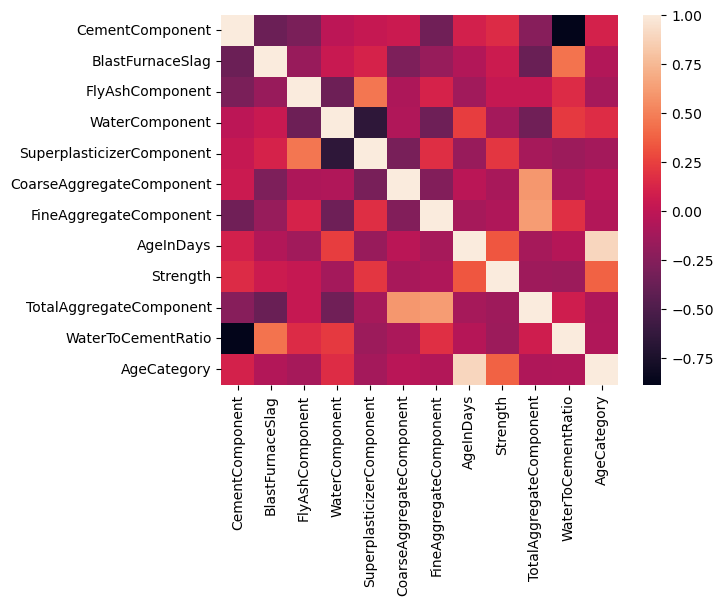

In [11]:
sns.heatmap(cor)

In [12]:
X = df.drop('Strength', axis =1)
y= df['Strength']

In [13]:
scaler = StandardScaler()
trans_X = scaler.fit_transform(X)
test_data = scaler.transform(test_df)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(trans_X, y, test_size = 0.2)

In [15]:
trans_test = scaler.transform(test_df)

In [16]:
models = {"Random":RandomForestRegressor(),
"XGB":XGBRegressor(),
"Decision":DecisionTreeRegressor(),
"LGBM":LGBMRegressor(),
"CAT":CatBoostRegressor(),
"Linear":LinearRegression()}

rmse_scores = {}

for name, model in models.items():
    
    pipeline= make_pipeline(StandardScaler(),
                           model)
    
    pipeline_models = pipeline.fit(X_train, y_train)
    
    prediction = pipeline_models.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, prediction))
    
    rmse_scores[name] = rmse
    

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1604
[LightGBM] [Info] Number of data points in the train set: 4325, number of used features: 11
[LightGBM] [Info] Start training from score 35.431665
Learning rate set to 0.051602
0:	learn: 16.0509144	total: 136ms	remaining: 2m 15s
1:	learn: 15.7363721	total: 143ms	remaining: 1m 11s
2:	learn: 15.4370182	total: 149ms	remaining: 49.5s
3:	learn: 15.1621505	total: 156ms	remaining: 38.8s
4:	learn: 14.9091574	total: 160ms	remaining: 31.9s
5:	learn: 14.6681002	total: 164ms	remaining: 27.2s
6:	learn: 14.4431993	total: 168ms	remaining: 23.8s
7:	learn: 14.2494445	total: 172ms	remaining: 21.3s
8:	learn: 14.0718782	total: 175ms	remaining: 19.3s
9:	learn: 13.9150396	total: 179ms	remaining: 17.7s
10:	learn: 13.7613883	total: 182ms	remaining: 16.3s


178:	learn: 11.3479979	total: 523ms	remaining: 2.4s
179:	learn: 11.3453805	total: 526ms	remaining: 2.39s
180:	learn: 11.3416961	total: 529ms	remaining: 2.39s
181:	learn: 11.3375875	total: 532ms	remaining: 2.39s
182:	learn: 11.3337543	total: 534ms	remaining: 2.38s
183:	learn: 11.3323014	total: 538ms	remaining: 2.38s
184:	learn: 11.3305291	total: 544ms	remaining: 2.39s
185:	learn: 11.3266037	total: 546ms	remaining: 2.39s
186:	learn: 11.3247378	total: 548ms	remaining: 2.38s
187:	learn: 11.3230266	total: 551ms	remaining: 2.38s
188:	learn: 11.3194185	total: 553ms	remaining: 2.37s
189:	learn: 11.3157650	total: 556ms	remaining: 2.37s
190:	learn: 11.3144414	total: 558ms	remaining: 2.37s
191:	learn: 11.3106797	total: 562ms	remaining: 2.36s
192:	learn: 11.3084042	total: 564ms	remaining: 2.36s
193:	learn: 11.3068319	total: 566ms	remaining: 2.35s
194:	learn: 11.3047281	total: 569ms	remaining: 2.35s
195:	learn: 11.3013265	total: 573ms	remaining: 2.35s
196:	learn: 11.2994198	total: 578ms	remaining: 

376:	learn: 10.7950872	total: 928ms	remaining: 1.53s
377:	learn: 10.7916335	total: 931ms	remaining: 1.53s
378:	learn: 10.7891641	total: 934ms	remaining: 1.53s
379:	learn: 10.7856688	total: 936ms	remaining: 1.53s
380:	learn: 10.7830006	total: 939ms	remaining: 1.52s
381:	learn: 10.7808804	total: 941ms	remaining: 1.52s
382:	learn: 10.7791449	total: 944ms	remaining: 1.52s
383:	learn: 10.7769680	total: 946ms	remaining: 1.52s
384:	learn: 10.7745793	total: 949ms	remaining: 1.51s
385:	learn: 10.7726256	total: 951ms	remaining: 1.51s
386:	learn: 10.7714274	total: 953ms	remaining: 1.51s
387:	learn: 10.7692323	total: 956ms	remaining: 1.51s
388:	learn: 10.7673101	total: 958ms	remaining: 1.5s
389:	learn: 10.7643436	total: 960ms	remaining: 1.5s
390:	learn: 10.7611120	total: 962ms	remaining: 1.5s
391:	learn: 10.7594830	total: 965ms	remaining: 1.5s
392:	learn: 10.7561823	total: 967ms	remaining: 1.49s
393:	learn: 10.7535075	total: 969ms	remaining: 1.49s
394:	learn: 10.7517443	total: 971ms	remaining: 1.4

578:	learn: 10.3772906	total: 1.32s	remaining: 963ms
579:	learn: 10.3757936	total: 1.33s	remaining: 961ms
580:	learn: 10.3753805	total: 1.33s	remaining: 959ms
581:	learn: 10.3724947	total: 1.33s	remaining: 957ms
582:	learn: 10.3712582	total: 1.33s	remaining: 954ms
583:	learn: 10.3692184	total: 1.34s	remaining: 952ms
584:	learn: 10.3675412	total: 1.34s	remaining: 950ms
585:	learn: 10.3651734	total: 1.34s	remaining: 947ms
586:	learn: 10.3645403	total: 1.34s	remaining: 945ms
587:	learn: 10.3617397	total: 1.34s	remaining: 942ms
588:	learn: 10.3603043	total: 1.35s	remaining: 940ms
589:	learn: 10.3598848	total: 1.35s	remaining: 937ms
590:	learn: 10.3577292	total: 1.35s	remaining: 934ms
591:	learn: 10.3568155	total: 1.35s	remaining: 932ms
592:	learn: 10.3553255	total: 1.35s	remaining: 929ms
593:	learn: 10.3546386	total: 1.36s	remaining: 927ms
594:	learn: 10.3543637	total: 1.36s	remaining: 925ms
595:	learn: 10.3521734	total: 1.36s	remaining: 922ms
596:	learn: 10.3486637	total: 1.36s	remaining:

772:	learn: 10.0645685	total: 1.72s	remaining: 506ms
773:	learn: 10.0635063	total: 1.73s	remaining: 504ms
774:	learn: 10.0622894	total: 1.73s	remaining: 501ms
775:	learn: 10.0598060	total: 1.73s	remaining: 499ms
776:	learn: 10.0581081	total: 1.73s	remaining: 497ms
777:	learn: 10.0577705	total: 1.73s	remaining: 495ms
778:	learn: 10.0570092	total: 1.74s	remaining: 492ms
779:	learn: 10.0557887	total: 1.74s	remaining: 490ms
780:	learn: 10.0550331	total: 1.74s	remaining: 488ms
781:	learn: 10.0544844	total: 1.74s	remaining: 486ms
782:	learn: 10.0533136	total: 1.74s	remaining: 483ms
783:	learn: 10.0519658	total: 1.75s	remaining: 481ms
784:	learn: 10.0512657	total: 1.75s	remaining: 479ms
785:	learn: 10.0497103	total: 1.75s	remaining: 476ms
786:	learn: 10.0464995	total: 1.75s	remaining: 474ms
787:	learn: 10.0450232	total: 1.75s	remaining: 472ms
788:	learn: 10.0437081	total: 1.75s	remaining: 469ms
789:	learn: 10.0426734	total: 1.76s	remaining: 467ms
790:	learn: 10.0422343	total: 1.76s	remaining:

977:	learn: 9.7997915	total: 2.13s	remaining: 47.9ms
978:	learn: 9.7982643	total: 2.13s	remaining: 45.7ms
979:	learn: 9.7974038	total: 2.13s	remaining: 43.5ms
980:	learn: 9.7966916	total: 2.13s	remaining: 41.4ms
981:	learn: 9.7959035	total: 2.14s	remaining: 39.2ms
982:	learn: 9.7939484	total: 2.14s	remaining: 37ms
983:	learn: 9.7928444	total: 2.14s	remaining: 34.8ms
984:	learn: 9.7923104	total: 2.14s	remaining: 32.7ms
985:	learn: 9.7913809	total: 2.15s	remaining: 30.5ms
986:	learn: 9.7904689	total: 2.15s	remaining: 28.3ms
987:	learn: 9.7891794	total: 2.15s	remaining: 26.1ms
988:	learn: 9.7878462	total: 2.15s	remaining: 23.9ms
989:	learn: 9.7869400	total: 2.15s	remaining: 21.8ms
990:	learn: 9.7859181	total: 2.16s	remaining: 19.6ms
991:	learn: 9.7850578	total: 2.16s	remaining: 17.4ms
992:	learn: 9.7844308	total: 2.16s	remaining: 15.2ms
993:	learn: 9.7830847	total: 2.16s	remaining: 13ms
994:	learn: 9.7822749	total: 2.16s	remaining: 10.9ms
995:	learn: 9.7809656	total: 2.17s	remaining: 8.7m

In [17]:
for name, rmse in rmse_scores.items():
    print(f"{name}: RMSE = {round(rmse,2)}")

Random: RMSE = 13.26
XGB: RMSE = 13.41
Decision: RMSE = 15.98
LGBM: RMSE = 12.73
CAT: RMSE = 12.62
Linear: RMSE = 14.47


In [30]:
cat = CatBoostRegressor()

In [31]:
cat_model = cat.fit(X_train, y_train)
    
y_pred = cat_model.predict(test_data)

Learning rate set to 0.051602
0:	learn: 16.0509144	total: 2.72ms	remaining: 2.72s
1:	learn: 15.7363721	total: 4.98ms	remaining: 2.49s
2:	learn: 15.4370182	total: 7.08ms	remaining: 2.35s
3:	learn: 15.1621505	total: 9.34ms	remaining: 2.33s
4:	learn: 14.9091574	total: 11.7ms	remaining: 2.33s
5:	learn: 14.6681002	total: 14.5ms	remaining: 2.4s
6:	learn: 14.4431993	total: 16.8ms	remaining: 2.39s
7:	learn: 14.2494445	total: 19ms	remaining: 2.36s
8:	learn: 14.0718782	total: 21.2ms	remaining: 2.33s
9:	learn: 13.9150396	total: 23.3ms	remaining: 2.31s
10:	learn: 13.7613883	total: 25.6ms	remaining: 2.3s
11:	learn: 13.6138976	total: 27.9ms	remaining: 2.29s
12:	learn: 13.4838833	total: 30.2ms	remaining: 2.29s
13:	learn: 13.3631858	total: 32.2ms	remaining: 2.27s
14:	learn: 13.2449980	total: 34.4ms	remaining: 2.26s
15:	learn: 13.1355033	total: 36.7ms	remaining: 2.26s
16:	learn: 13.0479787	total: 38.4ms	remaining: 2.22s
17:	learn: 12.9489606	total: 40.5ms	remaining: 2.21s
18:	learn: 12.8760024	total: 4

194:	learn: 11.3047281	total: 380ms	remaining: 1.57s
195:	learn: 11.3013265	total: 383ms	remaining: 1.57s
196:	learn: 11.2994198	total: 385ms	remaining: 1.57s
197:	learn: 11.2978215	total: 387ms	remaining: 1.57s
198:	learn: 11.2955567	total: 389ms	remaining: 1.57s
199:	learn: 11.2938183	total: 391ms	remaining: 1.56s
200:	learn: 11.2927011	total: 393ms	remaining: 1.56s
201:	learn: 11.2890537	total: 396ms	remaining: 1.56s
202:	learn: 11.2856969	total: 399ms	remaining: 1.56s
203:	learn: 11.2817478	total: 403ms	remaining: 1.57s
204:	learn: 11.2797437	total: 406ms	remaining: 1.57s
205:	learn: 11.2775640	total: 408ms	remaining: 1.57s
206:	learn: 11.2760830	total: 410ms	remaining: 1.57s
207:	learn: 11.2742387	total: 413ms	remaining: 1.57s
208:	learn: 11.2710656	total: 415ms	remaining: 1.57s
209:	learn: 11.2670451	total: 418ms	remaining: 1.57s
210:	learn: 11.2642566	total: 421ms	remaining: 1.57s
211:	learn: 11.2620719	total: 424ms	remaining: 1.57s
212:	learn: 11.2594730	total: 427ms	remaining:

397:	learn: 10.7413119	total: 785ms	remaining: 1.19s
398:	learn: 10.7407896	total: 787ms	remaining: 1.19s
399:	learn: 10.7403008	total: 790ms	remaining: 1.18s
400:	learn: 10.7381738	total: 792ms	remaining: 1.18s
401:	learn: 10.7360471	total: 795ms	remaining: 1.18s
402:	learn: 10.7336730	total: 797ms	remaining: 1.18s
403:	learn: 10.7322478	total: 800ms	remaining: 1.18s
404:	learn: 10.7297154	total: 805ms	remaining: 1.18s
405:	learn: 10.7278495	total: 807ms	remaining: 1.18s
406:	learn: 10.7273829	total: 810ms	remaining: 1.18s
407:	learn: 10.7249519	total: 813ms	remaining: 1.18s
408:	learn: 10.7192081	total: 815ms	remaining: 1.18s
409:	learn: 10.7165803	total: 817ms	remaining: 1.18s
410:	learn: 10.7160579	total: 820ms	remaining: 1.17s
411:	learn: 10.7134838	total: 822ms	remaining: 1.17s
412:	learn: 10.7104872	total: 825ms	remaining: 1.17s
413:	learn: 10.7082760	total: 828ms	remaining: 1.17s
414:	learn: 10.7050132	total: 830ms	remaining: 1.17s
415:	learn: 10.7043719	total: 832ms	remaining:

563:	learn: 10.4053232	total: 1.17s	remaining: 903ms
564:	learn: 10.4051107	total: 1.17s	remaining: 901ms
565:	learn: 10.4030645	total: 1.17s	remaining: 900ms
566:	learn: 10.4009066	total: 1.18s	remaining: 898ms
567:	learn: 10.3982802	total: 1.18s	remaining: 896ms
568:	learn: 10.3963690	total: 1.18s	remaining: 894ms
569:	learn: 10.3950202	total: 1.18s	remaining: 892ms
570:	learn: 10.3931953	total: 1.19s	remaining: 890ms
571:	learn: 10.3913078	total: 1.19s	remaining: 889ms
572:	learn: 10.3882558	total: 1.19s	remaining: 887ms
573:	learn: 10.3859642	total: 1.19s	remaining: 885ms
574:	learn: 10.3853891	total: 1.2s	remaining: 884ms
575:	learn: 10.3831218	total: 1.2s	remaining: 883ms
576:	learn: 10.3810785	total: 1.2s	remaining: 881ms
577:	learn: 10.3794328	total: 1.2s	remaining: 879ms
578:	learn: 10.3772906	total: 1.21s	remaining: 877ms
579:	learn: 10.3757936	total: 1.21s	remaining: 875ms
580:	learn: 10.3753805	total: 1.21s	remaining: 873ms
581:	learn: 10.3724947	total: 1.21s	remaining: 871

739:	learn: 10.1147981	total: 1.54s	remaining: 543ms
740:	learn: 10.1137566	total: 1.55s	remaining: 541ms
741:	learn: 10.1125278	total: 1.55s	remaining: 539ms
742:	learn: 10.1113936	total: 1.55s	remaining: 537ms
743:	learn: 10.1108055	total: 1.55s	remaining: 535ms
744:	learn: 10.1096307	total: 1.56s	remaining: 533ms
745:	learn: 10.1080977	total: 1.56s	remaining: 531ms
746:	learn: 10.1061840	total: 1.56s	remaining: 529ms
747:	learn: 10.1045400	total: 1.56s	remaining: 527ms
748:	learn: 10.1034046	total: 1.57s	remaining: 525ms
749:	learn: 10.1026674	total: 1.57s	remaining: 523ms
750:	learn: 10.1021457	total: 1.57s	remaining: 521ms
751:	learn: 10.1010002	total: 1.57s	remaining: 519ms
752:	learn: 10.0993553	total: 1.58s	remaining: 517ms
753:	learn: 10.0975107	total: 1.58s	remaining: 515ms
754:	learn: 10.0950554	total: 1.58s	remaining: 513ms
755:	learn: 10.0946808	total: 1.58s	remaining: 511ms
756:	learn: 10.0930671	total: 1.58s	remaining: 509ms
757:	learn: 10.0927076	total: 1.59s	remaining:

920:	learn: 9.8704016	total: 1.94s	remaining: 166ms
921:	learn: 9.8698606	total: 1.94s	remaining: 164ms
922:	learn: 9.8693900	total: 1.94s	remaining: 162ms
923:	learn: 9.8662334	total: 1.94s	remaining: 160ms
924:	learn: 9.8654937	total: 1.95s	remaining: 158ms
925:	learn: 9.8649140	total: 1.95s	remaining: 156ms
926:	learn: 9.8644802	total: 1.95s	remaining: 154ms
927:	learn: 9.8625309	total: 1.95s	remaining: 152ms
928:	learn: 9.8615088	total: 1.96s	remaining: 150ms
929:	learn: 9.8600309	total: 1.96s	remaining: 147ms
930:	learn: 9.8582354	total: 1.96s	remaining: 145ms
931:	learn: 9.8569177	total: 1.96s	remaining: 143ms
932:	learn: 9.8555581	total: 1.97s	remaining: 141ms
933:	learn: 9.8544894	total: 1.97s	remaining: 139ms
934:	learn: 9.8537348	total: 1.97s	remaining: 137ms
935:	learn: 9.8526251	total: 1.97s	remaining: 135ms
936:	learn: 9.8510598	total: 1.97s	remaining: 133ms
937:	learn: 9.8498984	total: 1.98s	remaining: 131ms
938:	learn: 9.8496021	total: 1.98s	remaining: 129ms
939:	learn: 

In [32]:
submission = pd.read_csv("sample_submission.csv")
submission

,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452
...,...,...
3600,9007,35.452
3601,9008,35.452
3602,9009,35.452
3603,9010,35.452


In [33]:
submission["Strength"] = y_pred

In [34]:
submission.to_csv("second_submission.csv", columns = submission.columns, index = False)
submission.head(10)

,id,Strength
0,5407,50.903321
1,5408,18.801042
2,5409,35.704065
3,5410,49.539924
4,5411,31.439007
5,5412,48.954440
6,5413,31.825456
7,5414,22.544569
8,5415,48.157954
9,5416,37.442041
